In [5]:
import librosa

In [6]:
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
seaborn.set(style='ticks')

In [7]:
import numpy as np

---
# Onset and beat

In [8]:
y, sr = librosa.load(librosa.util.example_audio_file(), offset=25, duration=20)

In [9]:
S, P = librosa.magphase(librosa.stft(y))

In [10]:
C = librosa.cqt(y, sr=sr, fmin=librosa.note_to_hz('C2'))

In [11]:
odf = librosa.onset.onset_strength(y=y, sr=sr)

In [12]:
onsets = librosa.onset.onset_detect(y=y, sr=sr)

In [13]:
tempo, beats = librosa.beat.beat_track(y=y, sr=sr, trim=False)

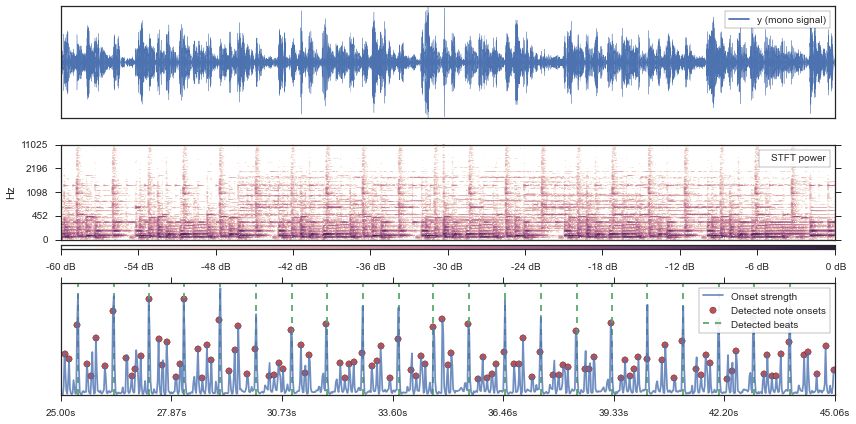

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
librosa.display.waveplot(y=y, sr=sr)
plt.xticks([])
plt.yticks([])
plt.plot([], color=seaborn.color_palette()[0], label='y (mono signal)')
plt.legend(frameon=True, framealpha=0.9, loc='best')

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.logamplitude(S**2, ref_power=np.max, top_db=60), y_axis='log')
plt.colorbar(orientation='horizontal', fraction=0.1, aspect=200, format='%2.0f dB', pad=0.05)
plt.plot([], linestyle='', marker='', label='STFT power')
plt.legend(frameon=True, framealpha=0.9, loc='best', handlelength=0)


plt.subplot(3, 1, 3)
plt.plot(odf, alpha=0.8, label='Onset strength')
plt.scatter(onsets, odf[onsets], c=seaborn.color_palette()[2], marker='o', s=40, label='Detected note onsets')
plt.vlines(beats,
           odf.min(),
           1.05 * odf.max(),
           colors=seaborn.color_palette()[1],
           linestyle='--', label='Detected beats')
plt.xlim([0, len(odf)])
plt.ylim([odf.min(), odf.max() * 1.05])
plt.yticks([])

librosa.display.time_ticks(np.linspace(0, len(odf), num=8, endpoint=True),
                           25.0 + librosa.frames_to_time(np.linspace(0, len(odf), num=8, endpoint=True),
                                                         sr=sr,
                                                         hop_length=512),
                           n_ticks=8)

plt.legend(frameon=True, framealpha=0.9)

plt.tight_layout()
plt.savefig('tour.pdf', pad_inches=None, bbox_inches='tight')

---
# Features

In [15]:
specgram = np.abs(librosa.stft(y=y))

In [16]:
melspec = librosa.feature.melspectrogram(y=y, sr=sr)

In [17]:
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)

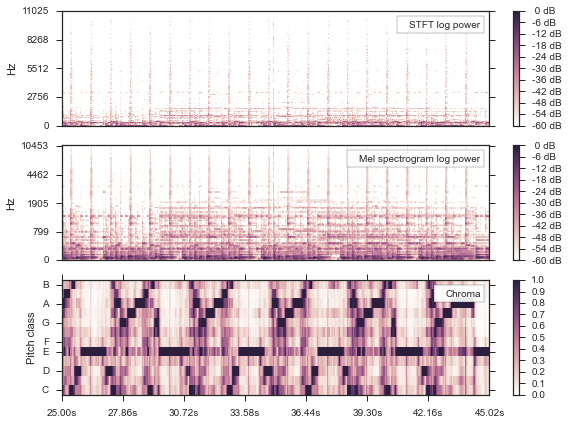

In [18]:
plt.figure(figsize=(8, 6))

plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.logamplitude(specgram**2, ref_power=np.max, top_db=60), y_axis='linear')
plt.plot([], linestyle='', marker='', label='STFT log power')
plt.legend(frameon=True, framealpha=0.9, loc='best', handlelength=0)
plt.colorbar(format='%2.0f dB', fraction=0.05, pad=0.05)

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.logamplitude(melspec, ref_power=np.max, top_db=60), y_axis='mel')
plt.plot([], linestyle='', marker='', label='Mel spectrogram log power')
plt.legend(frameon=True, framealpha=0.9, loc='best', handlelength=0)
plt.colorbar(format='%2.0f dB', fraction=0.05, pad=0.05)

plt.subplot(3, 1, 3)
librosa.display.specshow(chroma, y_axis='chroma', vmin=0, vmax=1.0)
librosa.display.time_ticks(np.linspace(0, chroma.shape[-1], num=8, endpoint=True),
                           25.0 + librosa.frames_to_time(np.linspace(0, chroma.shape[-1], num=8, endpoint=True),
                                                         sr=sr,
                                                         hop_length=512),
                           n_ticks=8)
plt.colorbar(fraction=0.05, pad=0.05)

plt.plot([], linestyle='', marker='', label='Chroma')
plt.legend(frameon=True, framealpha=0.9, loc='best', handlelength=0)

plt.tight_layout()
plt.savefig('feature.pdf', pad_inches=None, bbox_inches='tight')

---
# Segment

In [19]:
R = librosa.segment.recurrence_matrix(chroma, metric='cosine')

In [20]:
L = librosa.segment.recurrence_to_lag(R)

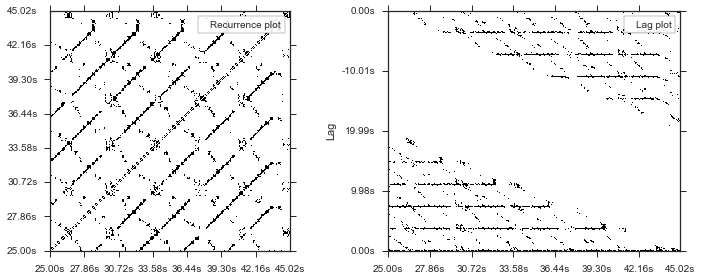

In [37]:
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
librosa.display.specshow(R, aspect='equal')
librosa.display.time_ticks(np.linspace(0, chroma.shape[-1], num=8, endpoint=True),
                           25.0 + librosa.frames_to_time(np.linspace(0, chroma.shape[-1], num=8, endpoint=True),
                                                         sr=sr,
                                                         hop_length=512),
                           n_ticks=8)
librosa.display.time_ticks(np.linspace(0, chroma.shape[-1], num=8, endpoint=True),
                           25.0 + librosa.frames_to_time(np.linspace(0, chroma.shape[-1], num=8, endpoint=True),
                                                         sr=sr,
                                                         hop_length=512),
                           n_ticks=8,
                          axis='y')

plt.plot([], linestyle='', marker='', label='Recurrence plot')
plt.legend(frameon=True, framealpha=0.9, loc='best', handlelength=0)

plt.subplot(1,2,2)
librosa.display.specshow(L, y_axis='lag')
librosa.display.time_ticks(np.linspace(0, chroma.shape[-1], num=8, endpoint=True),
                           25.0 + librosa.frames_to_time(np.linspace(0, chroma.shape[-1], num=8, endpoint=True),
                                                         sr=sr,
                                                         hop_length=512),
                           n_ticks=8)
plt.plot([], linestyle='', marker='', label='Lag plot')
plt.legend(frameon=True, framealpha=0.9, loc='best', handlelength=0)
plt.tight_layout()

plt.savefig('recurrence.pdf', pad_inches=None, bbox_inches='tight')

---

In [22]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

In [23]:
S_h = librosa.feature.melspectrogram(y_harmonic)
S_p = librosa.feature.melspectrogram(y_percussive)

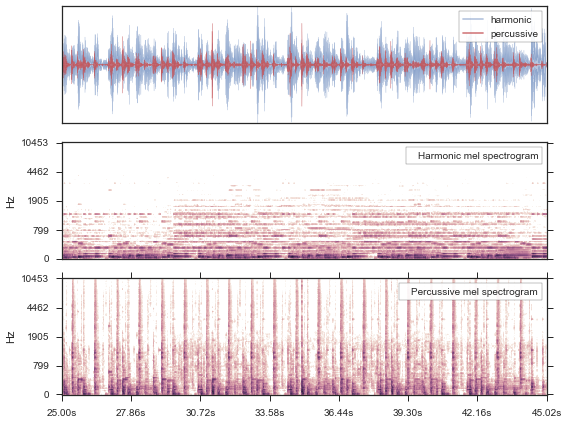

In [36]:
plt.figure(figsize=(8, 6))

plt.subplot(3, 1, 1)
librosa.display.waveplot(y_harmonic, color=seaborn.color_palette()[0], alpha=0.4)
librosa.display.waveplot(y_percussive, color=seaborn.color_palette()[2], alpha=0.7)
plt.xticks([])
plt.yticks([])
plt.plot([], color=seaborn.color_palette()[0], alpha=0.4, label='harmonic')
plt.plot([], color=seaborn.color_palette()[2], alpha=0.7, label='percussive')
plt.legend(frameon=True, framealpha=0.9, loc='best')

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.logamplitude(S_h, ref_power=np.max, top_db=60), y_axis='mel')
plt.plot([], linestyle='', marker='', label='Harmonic mel spectrogram')
plt.legend(frameon=True, framealpha=0.9, loc='best', handlelength=0)

plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.logamplitude(S_p, ref_power=np.max, top_db=60), y_axis='mel')
plt.plot([], linestyle='', marker='', label='Percussive mel spectrogram')
plt.legend(frameon=True, framealpha=0.9, loc='best', handlelength=0)
librosa.display.time_ticks(np.linspace(0, chroma.shape[-1], num=8, endpoint=True),
                           25.0 + librosa.frames_to_time(np.linspace(0, chroma.shape[-1], num=8, endpoint=True),
                                                         sr=sr,
                                                         hop_length=512),
                           n_ticks=8)

plt.tight_layout()
plt.savefig('hpss.pdf', pad_inches=None, bbox_inches='tight')